# Loss of Bee Colonies
## A review of information taken from the 2020 USDA survey 

## Problem Statement
### Honey bees are a vital part of our worldwide food chain as one of the main pollinators of fruits and vegetables.  This review of the survey data collected by the USDA in 2020 attempts to outline the connections between various problems facing honeybee columns and the urgent problem of colony collapse disorder (CCD).  

## Proposed Solution
### We originally hypothesized that we would establish evidence of the relationship between pesticide use and CCD, and a compelling case could be made to discontinue the use of pesticides where feasible.  While pesticides are certainly a contributor to colony collapse disorder, it is evident with further review that the biggest problem facing honey bees are varroa mites, and that effective control and elimination of varroa mites must be a priority to have healthy bee colonies

## Value
### The loss of honey bees may lead to large scale food shortages. It is vital to convince both individuals and governmental agencies that resources must be put in place to foster honey bee health, including limiting use of pesticides, further research and sharing of information on the control of pests, and particularly control and elimination of varroa mites.

## Final Thoughts and Next Steps
### There are a number of contributors to CCD. While governmental agencies and bee farmers must take steps to address the problems of mites, pests, and disease, the data also shows that a very large amount of bee colonies in each state are affected by pesticides, with thousands showing affects.  These compelling observations make a strong case for individual limits on the use of household pesticides in order to save the bees.

#### Import the required modules 

In [1]:
import requests
import numpy as np
import pandas as pd
import time
from pprint import pprint
from matplotlib import pyplot as plt
from scipy import stats

#### Extract the required data from the usda website using the parameters of honey bees, survey format and state level information.  Import in JSON format.

In [2]:
apikey = "15B191E7-B8C5-3AF1-9E28-97FD910F9119"
usda_url ="http://quickstats.nass.usda.gov/api/api_GET/?key=15B191E7-B8C5-3AF1-9E28-97FD910F9119&source_desc=SURVEY&commodity_desc=HONEY&agg_level_desc=STATE&param=short_desc"
usda_data= requests.get(usda_url).json()
usda_data

{'data': [{'domaincat_desc': 'NOT SPECIFIED',
   'country_name': 'UNITED STATES',
   'week_ending': '',
   'Value': '5.43',
   'sector_desc': 'ANIMALS & PRODUCTS',
   'class_desc': 'ALL CLASSES',
   'group_desc': 'SPECIALTY',
   'load_time': '2021-03-18 15:00:29',
   'end_code': '00',
   'domain_desc': 'TOTAL',
   'unit_desc': '$ / LB',
   'state_alpha': 'AL',
   'source_desc': 'SURVEY',
   'freq_desc': 'ANNUAL',
   'county_name': '',
   'begin_code': '00',
   'statisticcat_desc': 'PRICE RECEIVED',
   'country_code': '9000',
   'state_fips_code': '01',
   'util_practice_desc': 'ALL UTILIZATION PRACTICES',
   'location_desc': 'ALABAMA',
   'short_desc': 'HONEY - PRICE RECEIVED, MEASURED IN $ / LB',
   'watershed_desc': '',
   'county_code': '',
   'asd_code': '',
   'state_name': 'ALABAMA',
   'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
   'state_ansi': '01',
   'agg_level_desc': 'STATE',
   'region_desc': '',
   'commodity_desc': 'HONEY',
   'county_ansi': '',
   'watershed_code

#### Formatted the resulting dictionary into a list and put it into DataFrame format. 

In [3]:
new_usda_list=usda_data['data']
usda_df=pd.DataFrame(new_usda_list)
usda_df

domaincat_desc   country_name week_ending Value         sector_desc  \
0      NOT SPECIFIED  UNITED STATES              5.43  ANIMALS & PRODUCTS   
1      NOT SPECIFIED  UNITED STATES              3.38  ANIMALS & PRODUCTS   
2      NOT SPECIFIED  UNITED STATES              3.72  ANIMALS & PRODUCTS   
3      NOT SPECIFIED  UNITED STATES              2.18  ANIMALS & PRODUCTS   
4      NOT SPECIFIED  UNITED STATES              2.04  ANIMALS & PRODUCTS   
...              ...            ...         ...   ...                 ...   
21637  NOT SPECIFIED  UNITED STATES                 0  ANIMALS & PRODUCTS   
21638  NOT SPECIFIED  UNITED STATES                 2  ANIMALS & PRODUCTS   
21639  NOT SPECIFIED  UNITED STATES                18  ANIMALS & PRODUCTS   
21640  NOT SPECIFIED  UNITED STATES                 6  ANIMALS & PRODUCTS   
21641  NOT SPECIFIED  UNITED STATES                 0  ANIMALS & PRODUCTS   

         class_desc group_desc            load_time end_code domain_desc  ...  \
0       ALL CLASSES  SPECIALTY  2021-03-18 15:00:29       00       TOTAL  ...   
1       ALL CLASSES  SPECIALTY  2021-03-18 15:00:29       00       TOTAL  ...   
2       ALL CLASSES  SPECIALTY  2020-03-19 15:06:59       00       TOTAL  ...   
3       ALL CLASSES  SPECIALTY  2021-03-18 15:00:29       00       TOTAL  ...   
4       ALL CLASSES  SPECIALTY  2021-03-18 15:00:29       00       TOTAL  ...   
...             ...        ...                  ...      ...         ...  ...   
21637  BEE COLONIES  SPECIALTY  2017-08-01 15:00:29       12       TOTAL  ...   
21638  BEE COLONIES  SPECIALTY  2016-05-12 15:09:03       03       TOTAL  ...   
21639  BEE COLONIES  SPECIALTY  2016-05-12 15:09:03       06       TOTAL  ...   
21640  BEE COLONIES  SPECIALTY  2016-05-12 15:09:03       09       TOTAL  ...   
21641  BEE COLONIES  SPECIALTY  2016-05-12 15:09:03       12       TOTAL  ...   

      region_desc commodity_desc county_ansi watershed_code CV (%)  \
0                          HONEY                   00000000          
1                          HONEY                   00000000          
2                          HONEY                   00000000          
3                          HONEY                   00000000          
4                          HONEY                   00000000          
...           ...            ...         ...            ...    ...   
21637                      HONEY                   00000000          
21638                      HONEY                   00000000          
21639                      HONEY                   00000000          
21640                      HONEY                   00000000          
21641                      HONEY                   00000000          

      reference_period_desc  year asd_desc congr_district_code zip_5  
0            MARKETING YEAR  2020                                     
1            MARKETING YEAR  2019                                     
2            MARKETING YEAR  2018                                     
3            MARKETING YEAR  2020                                     
4            MARKETING YEAR  2019                                     
...                     ...   ...      ...                 ...   ...  
21637          OCT THRU DEC  2016                                     
21638          JAN THRU MAR  2015                                     
21639          APR THRU JUN  2015                                     
21640          JUL THRU SEP  2015                                     
21641          OCT THRU DEC  2015                                     

[21642 rows x 39 columns]

#### Extracted only the relevant eight columns from the full DataFrame.

In [4]:
usda_mod_df=usda_df[['reference_period_desc', 'source_desc', 'location_desc', 'sector_desc', 'year', 'Value', 'short_desc', 'statisticcat_desc']]
usda_mod_df

reference_period_desc source_desc location_desc         sector_desc  \
0            MARKETING YEAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
1            MARKETING YEAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
2            MARKETING YEAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
3            MARKETING YEAR      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
4            MARKETING YEAR      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
...                     ...         ...           ...                 ...   
21637          OCT THRU DEC      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
21638          JAN THRU MAR      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
21639          APR THRU JUN      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
21640          JUL THRU SEP      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
21641          OCT THRU DEC      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

       year Value                                         short_desc  \
0      2020  5.43         HONEY - PRICE RECEIVED, MEASURED IN $ / LB   
1      2019  3.38         HONEY - PRICE RECEIVED, MEASURED IN $ / LB   
2      2018  3.72         HONEY - PRICE RECEIVED, MEASURED IN $ / LB   
3      2020  2.18         HONEY - PRICE RECEIVED, MEASURED IN $ / LB   
4      2019  2.04         HONEY - PRICE RECEIVED, MEASURED IN $ / LB   
...     ...   ...                                                ...   
21637  2016     0  HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...   
21638  2015     2  HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...   
21639  2015    18  HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...   
21640  2015     6  HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...   
21641  2015     0  HONEY, BEE COLONIES, RENOVATED - INVENTORY, ME...   

      statisticcat_desc  
0        PRICE RECEIVED  
1        PRICE RECEIVED  
2        PRICE RECEIVED  
3        PRICE RECEIVED  
4        PRICE RECEIVED  
...                 ...  
21637         INVENTORY  
21638         INVENTORY  
21639         INVENTORY  
21640         INVENTORY  
21641         INVENTORY  

[21642 rows x 8 columns]

#### Created a DataFrame with only the information on honey bee colonies lost to colony collapse disorder (CCD).  As the original column 'Value' was in string format, we have changed it to float format for use in calculations below.

In [6]:
#Extracted data with CCD for 2020 year (90 rows, 8 columns)
usda_collapse_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("COLONY COLLAPSE DISORDER")]
usda_collapse_2020 = usda_collapse_df[usda_collapse_df['year']==2020]
#Removed "," from value columns
usda_collapse_2020['Value']=usda_collapse_2020['Value'].str.replace(',','')
#converted value column in CCD 2020 from str to float
usda_collapse_2020['Value'] = usda_collapse_2020['Value'].astype(float)
usda_collapse_2020

<ipython-input-6-6cf34b283877>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_collapse_2020['Value']=usda_collapse_2020['Value'].str.replace(',','')
<ipython-input-6-6cf34b283877>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_collapse_2020['Value'] = usda_collapse_2020['Value'].astype(float)


reference_period_desc source_desc  location_desc         sector_desc  \
17562          JAN THRU MAR      SURVEY        ALABAMA  ANIMALS & PRODUCTS   
17563          APR THRU JUN      SURVEY        ALABAMA  ANIMALS & PRODUCTS   
17567          JAN THRU MAR      SURVEY        ARIZONA  ANIMALS & PRODUCTS   
17568          APR THRU JUN      SURVEY        ARIZONA  ANIMALS & PRODUCTS   
17572          JAN THRU MAR      SURVEY       ARKANSAS  ANIMALS & PRODUCTS   
...                     ...         ...            ...                 ...   
17773          APR THRU JUN      SURVEY  WEST VIRGINIA  ANIMALS & PRODUCTS   
17777          JAN THRU MAR      SURVEY      WISCONSIN  ANIMALS & PRODUCTS   
17778          APR THRU JUN      SURVEY      WISCONSIN  ANIMALS & PRODUCTS   
17782          JAN THRU MAR      SURVEY        WYOMING  ANIMALS & PRODUCTS   
17783          APR THRU JUN      SURVEY        WYOMING  ANIMALS & PRODUCTS   

       year   Value                                         short_desc  \
17562  2020    70.0  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   
17563  2020   410.0  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   
17567  2020  4300.0  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   
17568  2020   170.0  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   
17572  2020   390.0  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   
...     ...     ...                                                ...   
17773  2020   130.0  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   
17777  2020  1600.0  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   
17778  2020    90.0  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   
17782  2020  1500.0  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   
17783  2020   500.0  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   

                    statisticcat_desc  
17562  LOSS, COLONY COLLAPSE DISORDER  
17563  LOSS, COLONY COLLAPSE DISORDER  
17567  LOSS, COLONY COLLAPSE DISORDER  
17568  LOSS, COLONY COLLAPSE DISORDER  
17572  LOSS, COLONY COLLAPSE DISORDER  
...                               ...  
17773  LOSS, COLONY COLLAPSE DISORDER  
17777  LOSS, COLONY COLLAPSE DISORDER  
17778  LOSS, COLONY COLLAPSE DISORDER  
17782  LOSS, COLONY COLLAPSE DISORDER  
17783  LOSS, COLONY COLLAPSE DISORDER  

[90 rows x 8 columns]

#### Created a DataFrame with only the information on honey bee colonies affected by pesticides. As the original column 'Value' was in string format, we have changed it to float format for use in calculations below.

In [7]:
#Extracted data with pesticides for 2020 year (92 rows, 8 columns)
usda_pesticide_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("AFFECTED BY PESTICIDES")]
usda_pesticide_2020 = usda_pesticide_df[usda_pesticide_df['year']==2020]
#converted value column from string to float
usda_pesticide_2020['Value']=pd.to_numeric(usda_pesticide_2020['Value'], errors='coerce')
usda_pesticide_2020

<ipython-input-7-3382efe17531>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_pesticide_2020['Value']=pd.to_numeric(usda_pesticide_2020['Value'], errors='coerce')


reference_period_desc source_desc location_desc         sector_desc  \
9322           JAN THRU MAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
9323           APR THRU JUN      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
9343           JAN THRU MAR      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
9344           APR THRU JUN      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
9364           JAN THRU MAR      SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
...                     ...         ...           ...                 ...   
10226          APR THRU JUN      SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
10246          JAN THRU MAR      SURVEY       WYOMING  ANIMALS & PRODUCTS   
10247          APR THRU JUN      SURVEY       WYOMING  ANIMALS & PRODUCTS   
10267          JAN THRU MAR      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
10268          APR THRU JUN      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

       year  Value                                         short_desc  \
9322   2020    0.1  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...   
9323   2020    7.7  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...   
9343   2020    0.0  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...   
9344   2020    4.2  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...   
9364   2020    2.6  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...   
...     ...    ...                                                ...   
10226  2020   25.1  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...   
10246  2020    0.0  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...   
10247  2020    1.1  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...   
10267  2020    0.0  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...   
10268  2020    0.0  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...   

      statisticcat_desc  
9322          INVENTORY  
9323          INVENTORY  
9343          INVENTORY  
9344          INVENTORY  
9364          INVENTORY  
...                 ...  
10226         INVENTORY  
10246         INVENTORY  
10247         INVENTORY  
10267         INVENTORY  
10268         INVENTORY  

[92 rows x 8 columns]

#### Created a DataFrame with only the information on honey bee colonies affected by pesticides. As the original column 'Value' was in string format, we have changed it to float format for use in calculations below.¶

In [8]:
#Extracted data with inventory for 2020 year (92 rows, 8 columns)
usda_inventory_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("INVENTORY, MAX,")]
usda_inventory_2020 = usda_inventory_df[usda_inventory_df['year']==2020]
#Renamed value column in inventory dataframe to inventory_value. Inplace=true changes the original dataframe
usda_inventory_2020.rename(columns={'Value':'inventory_value'},inplace=True)
usda_inventory_2020

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


reference_period_desc source_desc location_desc         sector_desc  \
16596          JAN THRU MAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
16597          APR THRU JUN      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
16617          JAN THRU MAR      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
16618          APR THRU JUN      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
16638          JAN THRU MAR      SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
...                     ...         ...           ...                 ...   
17500          APR THRU JUN      SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
17520          JAN THRU MAR      SURVEY       WYOMING  ANIMALS & PRODUCTS   
17521          APR THRU JUN      SURVEY       WYOMING  ANIMALS & PRODUCTS   
17541          JAN THRU MAR      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
17542          APR THRU JUN      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

       year inventory_value  \
16596  2020           8,000   
16597  2020           8,500   
16617  2020          32,000   
16618  2020          26,000   
16638  2020          17,500   
...     ...             ...   
17500  2020          53,000   
17520  2020          17,000   
17521  2020          24,000   
17541  2020           8,200   
17542  2020           7,440   

                                              short_desc statisticcat_desc  
16596  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...    INVENTORY, MAX  
16597  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...    INVENTORY, MAX  
16617  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...    INVENTORY, MAX  
16618  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...    INVENTORY, MAX  
16638  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...    INVENTORY, MAX  
...                                                  ...               ...  
17500  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...    INVENTORY, MAX  
17520  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...    INVENTORY, MAX  
17521  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...    INVENTORY, MAX  
17541  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...    INVENTORY, MAX  
17542  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...    INVENTORY, MAX  

[92 rows x 8 columns]

#### Created a merged DataFrame containing both the pesticide and inventory value information for each survey.

In [9]:
inv_pest=pd.merge(usda_inventory_2020,usda_pesticide_2020,how='outer',on=['reference_period_desc','location_desc'])

#### Converted the 'inventory_value' column to a float for use in calculations

In [10]:
#Replaced "," with '' in inv_pest['inventory_value'] column. 
inv_pest['inventory_value']=inv_pest['inventory_value'].str.replace(',','')
inv_pest['inventory_value']
#converted to float to make sure all the values are on float datatype. 
inv_pest['inventory_value']=inv_pest['inventory_value'].apply(lambda x: float(x))
inv_pest

reference_period_desc source_desc_x location_desc       sector_desc_x  \
0           JAN THRU MAR        SURVEY       ALABAMA  ANIMALS & PRODUCTS   
1           APR THRU JUN        SURVEY       ALABAMA  ANIMALS & PRODUCTS   
2           JAN THRU MAR        SURVEY       ARIZONA  ANIMALS & PRODUCTS   
3           APR THRU JUN        SURVEY       ARIZONA  ANIMALS & PRODUCTS   
4           JAN THRU MAR        SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
..                   ...           ...           ...                 ...   
87          APR THRU JUN        SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
88          JAN THRU MAR        SURVEY       WYOMING  ANIMALS & PRODUCTS   
89          APR THRU JUN        SURVEY       WYOMING  ANIMALS & PRODUCTS   
90          JAN THRU MAR        SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
91          APR THRU JUN        SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

    year_x  inventory_value  \
0     2020           8000.0   
1     2020           8500.0   
2     2020          32000.0   
3     2020          26000.0   
4     2020          17500.0   
..     ...              ...   
87    2020          53000.0   
88    2020          17000.0   
89    2020          24000.0   
90    2020           8200.0   
91    2020           7440.0   

                                         short_desc_x statisticcat_desc_x  \
0   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
1   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
2   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
3   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
4   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
..                                                ...                 ...   
87  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
88  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
89  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
90  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
91  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   

   source_desc_y       sector_desc_y  year_y  Value  \
0         SURVEY  ANIMALS & PRODUCTS    2020    0.1   
1         SURVEY  ANIMALS & PRODUCTS    2020    7.7   
2         SURVEY  ANIMALS & PRODUCTS    2020    0.0   
3         SURVEY  ANIMALS & PRODUCTS    2020    4.2   
4         SURVEY  ANIMALS & PRODUCTS    2020    2.6   
..           ...                 ...     ...    ...   
87        SURVEY  ANIMALS & PRODUCTS    2020   25.1   
88        SURVEY  ANIMALS & PRODUCTS    2020    0.0   
89        SURVEY  ANIMALS & PRODUCTS    2020    1.1   
90        SURVEY  ANIMALS & PRODUCTS    2020    0.0   
91        SURVEY  ANIMALS & PRODUCTS    2020    0.0   

                                         short_desc_y statisticcat_desc_y  
0   HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY  
1   HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY  
2   HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY  
3   HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY  
4   HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY  
..                                                ...                 ...  
87  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY  
88  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY  
89  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY  
90  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY  
91  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY  

[92 rows x 14 columns]

#### Changed the name of the 'Value' column in the collapse dataframe to reflect 'value_ccd' and merged with the inv_pest dataframe to create one dataframe containing all relevant values per survey.

In [11]:
#Renamed the column 'Value' to 'value_ccd' in order to be able to merge this df into the one with the inventory and pesticide numbers
usda_collapse_2020_new=usda_collapse_2020.rename(columns={'Value': 'value_ccd' })
#Merge to get all value data in one place and grouped by state and time period
usda_total=pd.merge(inv_pest,usda_collapse_2020_new,how='outer',on=['reference_period_desc','location_desc'])
usda_total

reference_period_desc source_desc_x location_desc       sector_desc_x  \
0           JAN THRU MAR        SURVEY       ALABAMA  ANIMALS & PRODUCTS   
1           APR THRU JUN        SURVEY       ALABAMA  ANIMALS & PRODUCTS   
2           JAN THRU MAR        SURVEY       ARIZONA  ANIMALS & PRODUCTS   
3           APR THRU JUN        SURVEY       ARIZONA  ANIMALS & PRODUCTS   
4           JAN THRU MAR        SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
..                   ...           ...           ...                 ...   
87          APR THRU JUN        SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
88          JAN THRU MAR        SURVEY       WYOMING  ANIMALS & PRODUCTS   
89          APR THRU JUN        SURVEY       WYOMING  ANIMALS & PRODUCTS   
90          JAN THRU MAR        SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
91          APR THRU JUN        SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

    year_x  inventory_value  \
0     2020           8000.0   
1     2020           8500.0   
2     2020          32000.0   
3     2020          26000.0   
4     2020          17500.0   
..     ...              ...   
87    2020          53000.0   
88    2020          17000.0   
89    2020          24000.0   
90    2020           8200.0   
91    2020           7440.0   

                                         short_desc_x statisticcat_desc_x  \
0   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
1   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
2   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
3   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
4   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
..                                                ...                 ...   
87  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
88  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
89  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
90  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   
91  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...      INVENTORY, MAX   

   source_desc_y       sector_desc_y  year_y  Value  \
0         SURVEY  ANIMALS & PRODUCTS    2020    0.1   
1         SURVEY  ANIMALS & PRODUCTS    2020    7.7   
2         SURVEY  ANIMALS & PRODUCTS    2020    0.0   
3         SURVEY  ANIMALS & PRODUCTS    2020    4.2   
4         SURVEY  ANIMALS & PRODUCTS    2020    2.6   
..           ...                 ...     ...    ...   
87        SURVEY  ANIMALS & PRODUCTS    2020   25.1   
88        SURVEY  ANIMALS & PRODUCTS    2020    0.0   
89        SURVEY  ANIMALS & PRODUCTS    2020    1.1   
90        SURVEY  ANIMALS & PRODUCTS    2020    0.0   
91        SURVEY  ANIMALS & PRODUCTS    2020    0.0   

                                         short_desc_y statisticcat_desc_y  \
0   HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY   
1   HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY   
2   HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY   
3   HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY   
4   HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY   
..                                                ...                 ...   
87  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY   
88  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY   
89  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY   
90  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY   
91  HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...           INVENTORY   

   source_desc         sector_desc    year  value_ccd  \
0       SURVEY  ANIMALS & PRODUCTS  2020.0       70.0   
1       SURVEY  ANIMALS & PRODUCTS  2020.0      410.0   
2       SURVEY  ANIMALS & PRODUCTS 

#### Calculated the percentage of colonies affected by CCD

In [12]:
#Calculated the percentage of colonies lost to CCD
ccd_perc=round((usda_total['value_ccd']/usda_total['inventory_value'])*100, 2)
ccd_perc

0      0.88
1      4.82
2     13.44
3      0.65
4      2.23
      ...  
87     0.17
88     8.82
89     2.08
90      NaN
91      NaN
Length: 92, dtype: float64

#### Created a final survey level dataframe comparing percentages of colonies lost to CCD vs colonies affected by pesticides

In [13]:
#Created a copy of df containing only percent of colonies affected by pesticides
usda_total_comp=usda_total[['location_desc', 'reference_period_desc', 'Value']]
usda_total_compare=usda_total_comp.copy()
#added the percentage lost to colony collapse
usda_total_compare['ccd_perc']=ccd_perc
#Changed column names to appropriately reflect the values
usda_total_compare.rename(columns={'Value': '%_Colonies_Affected_by_Pesticides', 'ccd_perc': "%_Colonies_Lost_to_Colony_Collapse_Disorder"}, inplace=True)
#Replace NaN values in "OTHER STATES" with 0
usda_total_compare["%_Colonies_Lost_to_Colony_Collapse_Disorder"] = usda_total_compare["%_Colonies_Lost_to_Colony_Collapse_Disorder"].fillna(0)
usda_total_compare['%_Colonies_Affected_by_Pesticides'] = usda_total_compare["%_Colonies_Affected_by_Pesticides"].fillna(0)
usda_total_compare

location_desc reference_period_desc  %_Colonies_Affected_by_Pesticides  \
0        ALABAMA          JAN THRU MAR                                0.1   
1        ALABAMA          APR THRU JUN                                7.7   
2        ARIZONA          JAN THRU MAR                                0.0   
3        ARIZONA          APR THRU JUN                                4.2   
4       ARKANSAS          JAN THRU MAR                                2.6   
..           ...                   ...                                ...   
87     WISCONSIN          APR THRU JUN                               25.1   
88       WYOMING          JAN THRU MAR                                0.0   
89       WYOMING          APR THRU JUN                                1.1   
90  OTHER STATES          JAN THRU MAR                                0.0   
91  OTHER STATES          APR THRU JUN                                0.0   

    %_Colonies_Lost_to_Colony_Collapse_Disorder  
0                                          0.88  
1                                          4.82  
2                                         13.44  
3                                          0.65  
4                                          2.23  
..                                          ...  
87                                         0.17  
88                                         8.82  
89                                         2.08  
90                                         0.00  
91                                         0.00  

[92 rows x 4 columns]

#### Grouped the data at the state level

In [14]:
grp_usda_total_compare=usda_total_compare.groupby(usda_total_compare['location_desc']).sum()
grp_usda_total_compare

%_Colonies_Affected_by_Pesticides  \
location_desc                                       
ALABAMA                                       7.8   
ARIZONA                                       4.2   
ARKANSAS                                     27.2   
CALIFORNIA                                   10.7   
COLORADO                                      0.4   
CONNECTICUT                                   0.0   
FLORIDA                                      10.8   
GEORGIA                                       3.3   
HAWAII                                        0.0   
IDAHO                                        11.4   
ILLINOIS                                      8.3   
INDIANA                                      23.1   
IOWA                                          1.0   
KANSAS                                       40.6   
KENTUCKY                                      1.5   
LOUISIANA                                     1.3   
MAINE                                         0.0   
MARYLAND                                      1.1   
MASSACHUSETTS                                 0.7   
MICHIGAN                                      6.2   
MINNESOTA                                     9.0   
MISSISSIPPI                                   2.7   
MISSOURI                                      4.7   
MONTANA                                       0.0   
NEBRASKA                                     10.9   
NEW JERSEY                                    0.2   
NEW MEXICO                                    0.4   
NEW YORK                                      0.2   
NORTH CAROLINA                                0.6   
NORTH DAKOTA                                  3.0   
OHIO                                          5.9   
OKLAHOMA                                      1.4   
OREGON                                       16.7   
OTHER STATES                                  0.0   
PENNSYLVANIA                                  2.1   
SOUTH CAROLINA                                0.3   
SOUTH DAKOTA                                  2.5   
TENNESSEE                                     6.8   
TEXAS                                         8.0   
UTAH                                         15.4   
VERMONT                                       0.9   
VIRGINIA                                      0.7   
WASHINGTON                                    1.5   
WEST VIRGINIA                                 1.1   
WISCONSIN                                    25.1   
WYOMING                                       1.1   

                %_Colonies_Lost_to_Colony_Collapse_Disorder  
location_desc                                                
ALABAMA                                                5.70  
ARIZONA                                               14.09  
ARKANSAS                                               7.52  
CALIFORNIA                                             1.38  
COLORADO                                               5.03  
CONNECTICUT                                            0.24  
FLORIDA                                                9.71  
GEORGIA                                                9.33  
HAWAII                                                 1.62  
IDAHO                                                  6.23  
ILLINOIS                                               5.58  
INDIANA                                                2.08  
IOWA                                                   4.47  
KANSAS                                                13.38  
KENTUCKY                                               2.42  
LOUISIANA                                              2.56  
MAINE                                                  3.53  
MARYLAND                                               5.07  
MASSACHUSETTS                                          4.12  
MICHIGAN                                               2.68  
MINNESOTA                                             12.09  
MISSISSIPPI                                  

#### Broke the data down into two equal groups so that they can be easily readable in scatter graphs

In [15]:
grp1_usda_total_compare=grp_usda_total_compare.head(23)
grp1_usda_total_compare
grp2_usda_total_compare=grp_usda_total_compare.tail(23)
grp2_usda_total_compare

%_Colonies_Affected_by_Pesticides  \
location_desc                                       
MONTANA                                       0.0   
NEBRASKA                                     10.9   
NEW JERSEY                                    0.2   
NEW MEXICO                                    0.4   
NEW YORK                                      0.2   
NORTH CAROLINA                                0.6   
NORTH DAKOTA                                  3.0   
OHIO                                          5.9   
OKLAHOMA                                      1.4   
OREGON                                       16.7   
OTHER STATES                                  0.0   
PENNSYLVANIA                                  2.1   
SOUTH CAROLINA                                0.3   
SOUTH DAKOTA                                  2.5   
TENNESSEE                                     6.8   
TEXAS                                         8.0   
UTAH                                         15.4   
VERMONT                                       0.9   
VIRGINIA                                      0.7   
WASHINGTON                                    1.5   
WEST VIRGINIA                                 1.1   
WISCONSIN                                    25.1   
WYOMING                                       1.1   

                %_Colonies_Lost_to_Colony_Collapse_Disorder  
location_desc                                                
MONTANA                                               10.63  
NEBRASKA                                              10.61  
NEW JERSEY                                             0.91  
NEW MEXICO                                             0.00  
NEW YORK                                               2.65  
NORTH CAROLINA                                         9.42  
NORTH DAKOTA                                          16.30  
OHIO                                                  20.29  
OKLAHOMA                                               0.56  
OREGON                                                 2.46  
OTHER STATES                                           0.00  
PENNSYLVANIA                                           2.31  
SOUTH CAROLINA                                         2.52  
SOUTH DAKOTA                                           6.87  
TENNESSEE                                              4.49  
TEXAS                                                  2.30  
UTAH                                                   6.07  
VERMONT                                                0.80  
VIRGINIA                                               7.41  
WASHINGTON                                             9.10  
WEST VIRGINIA                                          4.23  
WISCONSIN                                              6.32  
WYOMING                                               10.90

#### More colonies appear to be affected by pesticides than lost to colony collapse disorder.

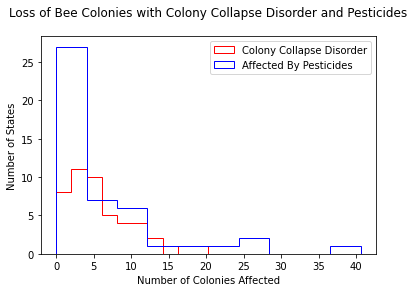

In [16]:
#Step histogram of both colony collapse disorder and pesticides percentages
fig, ax = plt.subplots()
ax.hist(grp_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], label="Colony Collapse Disorder", color='red', histtype="step")
ax.hist(grp_usda_total_compare['%_Colonies_Affected_by_Pesticides'], label="Affected By Pesticides", color='blue', histtype="step")
ax.set_title("Loss of Bee Colonies with Colony Collapse Disorder and Pesticides", pad=20)
ax.set_xlabel("Number of Colonies Affected")
ax.set_ylabel("Number of States")
ax.legend()
plt.savefig("bee_hist")
plt.show()


#### A view of survey results at the individual state level. 

<ipython-input-17-b046bb6af75a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)


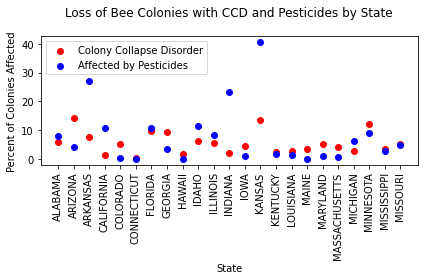

In [17]:
#Created a scatterplot to reflect percentages of colony collapse disorder and colonies affected by pesticides
fig, ax = plt.subplots()
ax.scatter(grp1_usda_total_compare.index, grp1_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp1_usda_total_compare.index, grp1_usda_total_compare['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.legend()
ax.set_title("Loss of Bee Colonies with CCD and Pesticides by State", pad=20)
ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
plt.tight_layout()
plt.savefig("grp1_scatter")
plt.show()

<ipython-input-18-ff91cd7e9ff8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp2_usda_total_compare.index, rotation=90)


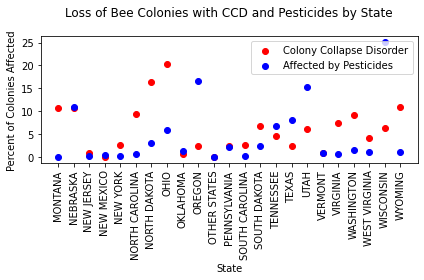

In [18]:
#Created a scatterplot to reflect percentages of colony collapse disorder and colonies affected by pesticides
fig, ax = plt.subplots()
ax.scatter(grp2_usda_total_compare.index, grp2_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp2_usda_total_compare.index, grp2_usda_total_compare['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.legend()
#Pad is spacing between title and plot
ax.set_title("Loss of Bee Colonies with CCD and Pesticides by State", pad=20)
ax.set_xticklabels(grp2_usda_total_compare.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
plt.tight_layout()
plt.savefig("grp2_scatter")
plt.show()

#### A calculation of the correlation coefficient shows little correlation.

In [19]:
np.corrcoef(usda_total_compare['%_Colonies_Affected_by_Pesticides'], usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'] )

array([[ 1.        , -0.08112837],
       [-0.08112837,  1.        ]])

In [20]:
usda_total_compare.describe()

%_Colonies_Affected_by_Pesticides  \
count                          92.000000   
mean                            3.052174   
std                             5.809721   
min                             0.000000   
25%                             0.000000   
50%                             0.500000   
75%                             3.025000   
max                            32.800000   

       %_Colonies_Lost_to_Colony_Collapse_Disorder  
count                                    92.000000  
mean                                      2.875000  
std                                       3.539015  
min                                       0.000000  
25%                                       0.680000  
50%                                       1.580000  
75%                                       3.575000  
max                                      19.500000

### Gathered a list of the types of information included in the honey bee survey

In [21]:
print(usda_df['short_desc'].unique())

['HONEY - PRICE RECEIVED, MEASURED IN $ / LB'
 'HONEY - PRICE RECEIVED, MEASURED IN CENTS / LB'
 'HONEY - PRODUCTION, MEASURED IN $' 'HONEY - PRODUCTION, MEASURED IN LB'
 'HONEY - PRODUCTION, MEASURED IN LB / COLONY'
 'HONEY - STOCKS, MEASURED IN LB'
 'HONEY, BEE COLONIES, AFFECTED BY DISEASE - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL VARROA MITES)) - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSES - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY VARROA MITES - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES - ADDED & REPLACED, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED IN COLONIES'
 'HONEY, BEE COL

### Created a dataframe which included all categories investigated for their effects on honey bees for the year 2020

In [22]:
#Extracted data with effects for 2020 year (92 rows, 8 columns)
usda_ab_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("AFFECTED BY")]
usda_ab_2020 = usda_ab_df[usda_ab_df['year']==2020]
#converted value column from string to float
usda_ab_2020['Value']=pd.to_numeric(usda_ab_2020['Value'], errors='coerce')
usda_ab_2020

<ipython-input-22-abcc64b7f58e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_ab_2020['Value']=pd.to_numeric(usda_ab_2020['Value'], errors='coerce')


reference_period_desc source_desc location_desc         sector_desc  \
7390           JAN THRU MAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
7391           APR THRU JUN      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
7411           JAN THRU MAR      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
7412           APR THRU JUN      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
7432           JAN THRU MAR      SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
...                     ...         ...           ...                 ...   
13124          APR THRU JUN      SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
13144          JAN THRU MAR      SURVEY       WYOMING  ANIMALS & PRODUCTS   
13145          APR THRU JUN      SURVEY       WYOMING  ANIMALS & PRODUCTS   
13165          JAN THRU MAR      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
13166          APR THRU JUN      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

       year  Value                                         short_desc  \
7390   2020    NaN  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...   
7391   2020    1.6  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...   
7411   2020    0.1  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...   
7412   2020    NaN  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...   
7432   2020    0.2  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...   
...     ...    ...                                                ...   
13124  2020   46.1  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...   
13144  2020    0.2  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...   
13145  2020   28.8  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...   
13165  2020    5.5  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...   
13166  2020   16.8  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...   

      statisticcat_desc  
7390          INVENTORY  
7391          INVENTORY  
7411          INVENTORY  
7412          INVENTORY  
7432          INVENTORY  
...                 ...  
13124         INVENTORY  
13144         INVENTORY  
13145         INVENTORY  
13165         INVENTORY  
13166         INVENTORY  

[552 rows x 8 columns]

### Dataframe which shows the full percentages for each category for the year at the state level

In [23]:
grp_usda_ab=usda_ab_2020.groupby(['location_desc','short_desc', 'year']).sum()
grp_usda_ab

Value
location_desc short_desc                                         year       
ALABAMA       HONEY, BEE COLONIES, AFFECTED BY DISEASE - INVE... 2020    1.6
              HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES -... 2020    9.6
              HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - I... 2020    7.8
              HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL V... 2020   21.4
              HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSES... 2020   13.8
...                                                                      ...
WYOMING       HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES -... 2020    4.3
              HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - I... 2020    1.1
              HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL V... 2020    0.1
              HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSES... 2020    2.9
              HONEY, BEE COLONIES, AFFECTED BY VARROA MITES -... 2020   29.0

[276 rows x 1 columns]

### Pulled each category for the year separately so that information can be merged later into a dataframe containing all information aggregated.

#### Honey Bee Colonies Affected By Disease

In [24]:
#Extracted data with disease for 2020 year (92 rows, 8 columns)
usda_disease_df = usda_ab_2020[usda_ab_2020['short_desc'].str.contains('HONEY, BEE COLONIES, AFFECTED BY DISEASE')]
#converted value column from string to float
usda_disease_df['Value']=pd.to_numeric(usda_disease_df['Value'], errors='coerce')
usda_disease_df=usda_disease_df.fillna(0)
usda_disease_df.rename(columns={'Value': '%_Colonies_Affected_by_Disease'}, inplace=True)
usda_disease_df

<ipython-input-24-6ec227cb9894>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_disease_df['Value']=pd.to_numeric(usda_disease_df['Value'], errors='coerce')


reference_period_desc source_desc location_desc         sector_desc  \
7390          JAN THRU MAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
7391          APR THRU JUN      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
7411          JAN THRU MAR      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
7412          APR THRU JUN      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
7432          JAN THRU MAR      SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
...                    ...         ...           ...                 ...   
8294          APR THRU JUN      SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
8314          JAN THRU MAR      SURVEY       WYOMING  ANIMALS & PRODUCTS   
8315          APR THRU JUN      SURVEY       WYOMING  ANIMALS & PRODUCTS   
8335          JAN THRU MAR      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
8336          APR THRU JUN      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

      year  %_Colonies_Affected_by_Disease  \
7390  2020                             0.0   
7391  2020                             1.6   
7411  2020                             0.1   
7412  2020                             0.0   
7432  2020                             0.2   
...    ...                             ...   
8294  2020                            25.0   
8314  2020                             0.1   
8315  2020                             0.1   
8335  2020                             0.0   
8336  2020                             0.7   

                                             short_desc statisticcat_desc  
7390  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...         INVENTORY  
7391  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...         INVENTORY  
7411  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...         INVENTORY  
7412  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...         INVENTORY  
7432  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...         INVENTORY  
...                                                 ...               ...  
8294  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...         INVENTORY  
8314  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...         INVENTORY  
8315  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...         INVENTORY  
8335  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...         INVENTORY  
8336  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...         INVENTORY  

[92 rows x 8 columns]

#### Honey Bee Colonies Affected By Pests

In [25]:
#Extracted data with pests for 2020 year (92 rows, 8 columns)
usda_pests_df = usda_ab_2020[usda_ab_2020['short_desc'].str.contains('HONEY, BEE COLONIES, AFFECTED BY PESTS')]
#converted value column from string to float
usda_pests_df['Value']=pd.to_numeric(usda_pests_df['Value'], errors='coerce')
usda_pests_df=usda_pests_df.fillna(0)
usda_pests_df.rename(columns={'Value': '%_Colonies_Affected_by_Pests'}, inplace=True)
usda_pests_df

<ipython-input-25-f7c3b3d47bd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_pests_df['Value']=pd.to_numeric(usda_pests_df['Value'], errors='coerce')


reference_period_desc source_desc location_desc         sector_desc  \
10288          JAN THRU MAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
10289          APR THRU JUN      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
10309          JAN THRU MAR      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
10310          APR THRU JUN      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
10330          JAN THRU MAR      SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
...                     ...         ...           ...                 ...   
11192          APR THRU JUN      SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
11212          JAN THRU MAR      SURVEY       WYOMING  ANIMALS & PRODUCTS   
11213          APR THRU JUN      SURVEY       WYOMING  ANIMALS & PRODUCTS   
11233          JAN THRU MAR      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
11234          APR THRU JUN      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

       year  %_Colonies_Affected_by_Pests  \
10288  2020                           3.4   
10289  2020                          18.0   
10309  2020                           0.1   
10310  2020                           0.0   
10330  2020                          22.7   
...     ...                           ...   
11192  2020                          27.3   
11212  2020                           0.1   
11213  2020                           0.0   
11233  2020                           0.0   
11234  2020                           1.1   

                                              short_desc statisticcat_desc  
10288  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...         INVENTORY  
10289  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...         INVENTORY  
10309  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...         INVENTORY  
10310  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...         INVENTORY  
10330  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...         INVENTORY  
...                                                  ...               ...  
11192  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...         INVENTORY  
11212  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...         INVENTORY  
11213  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...         INVENTORY  
11233  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...         INVENTORY  
11234  HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL ...         INVENTORY  

[92 rows x 8 columns]

#### Honey Bee Colonies Affected By Other Causes

In [26]:
#Extracted data with other causes for 2020 year (92 rows, 8 columns)
usda_other_df = usda_ab_2020[usda_ab_2020['short_desc'].str.contains('AFFECTED BY OTHER CAUSES')]
#converted value column from string to float
usda_other_df['Value']=pd.to_numeric(usda_other_df['Value'], errors='coerce')
usda_other_df=usda_other_df.fillna(0)
usda_other_df.rename(columns={'Value': '%_Colonies_Affected_by_Other_Causes'}, inplace=True)
usda_other_df

<ipython-input-26-9fcf0b62ee47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_other_df['Value']=pd.to_numeric(usda_other_df['Value'], errors='coerce')


reference_period_desc source_desc location_desc         sector_desc  \
8356          JAN THRU MAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
8357          APR THRU JUN      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
8377          JAN THRU MAR      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
8378          APR THRU JUN      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
8398          JAN THRU MAR      SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
...                    ...         ...           ...                 ...   
9260          APR THRU JUN      SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
9280          JAN THRU MAR      SURVEY       WYOMING  ANIMALS & PRODUCTS   
9281          APR THRU JUN      SURVEY       WYOMING  ANIMALS & PRODUCTS   
9301          JAN THRU MAR      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
9302          APR THRU JUN      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

      year  %_Colonies_Affected_by_Other_Causes  \
8356  2020                                  1.7   
8357  2020                                  7.9   
8377  2020                                 10.1   
8378  2020                                  5.5   
8398  2020                                  0.4   
...    ...                                  ...   
9260  2020                                 25.8   
9280  2020                                  0.8   
9281  2020                                  3.5   
9301  2020                                  0.7   
9302  2020                                  0.3   

                                             short_desc statisticcat_desc  
8356  HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...         INVENTORY  
8357  HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...         INVENTORY  
8377  HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...         INVENTORY  
8378  HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...         INVENTORY  
8398  HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...         INVENTORY  
...                                                 ...               ...  
9260  HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...         INVENTORY  
9280  HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...         INVENTORY  
9281  HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...         INVENTORY  
9301  HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...         INVENTORY  
9302  HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...         INVENTORY  

[92 rows x 8 columns]

#### Honey Bee Colonies Affected By Unknown Causes

In [27]:
#Extracted data with unknown causes for 2020 year (92 rows, 8 columns)
usda_unknown_df = usda_ab_2020[usda_ab_2020['short_desc'].str.contains('AFFECTED BY UNKNOWN CAUSES')]
#converted value column from string to float
usda_unknown_df['Value']=pd.to_numeric(usda_unknown_df['Value'], errors='coerce')
usda_unknown_df=usda_unknown_df.fillna(0)
usda_unknown_df.rename(columns={'Value': '%_Colonies_Affected_by_Unknown_Causes'}, inplace=True)
usda_unknown_df

<ipython-input-27-28ee63860d91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_unknown_df['Value']=pd.to_numeric(usda_unknown_df['Value'], errors='coerce')


reference_period_desc source_desc location_desc         sector_desc  \
11254          JAN THRU MAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
11255          APR THRU JUN      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
11275          JAN THRU MAR      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
11276          APR THRU JUN      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
11296          JAN THRU MAR      SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
...                     ...         ...           ...                 ...   
12158          APR THRU JUN      SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
12178          JAN THRU MAR      SURVEY       WYOMING  ANIMALS & PRODUCTS   
12179          APR THRU JUN      SURVEY       WYOMING  ANIMALS & PRODUCTS   
12199          JAN THRU MAR      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
12200          APR THRU JUN      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

       year  %_Colonies_Affected_by_Unknown_Causes  \
11254  2020                                    4.3   
11255  2020                                    9.5   
11275  2020                                    9.0   
11276  2020                                    0.6   
11296  2020                                   11.2   
...     ...                                    ...   
12158  2020                                   26.1   
12178  2020                                    1.7   
12179  2020                                    1.2   
12199  2020                                    0.4   
12200  2020                                    0.3   

                                              short_desc statisticcat_desc  
11254  HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...         INVENTORY  
11255  HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...         INVENTORY  
11275  HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...         INVENTORY  
11276  HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...         INVENTORY  
11296  HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...         INVENTORY  
...                                                  ...               ...  
12158  HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...         INVENTORY  
12178  HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...         INVENTORY  
12179  HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...         INVENTORY  
12199  HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...         INVENTORY  
12200  HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...         INVENTORY  

[92 rows x 8 columns]

#### Honey Bee Colonies Affected By Varroa Mites

In [28]:
#Extracted data with varroa mites for 2020 year (92 rows, 8 columns)
usda_mites_df = usda_ab_2020[usda_ab_2020['short_desc'].str.contains('AFFECTED BY VARROA MITES')]
#converted value column from string to float
usda_mites_df['Value']=pd.to_numeric(usda_mites_df['Value'], errors='coerce')
usda_mites_df=usda_mites_df.fillna(0)
usda_mites_df.rename(columns={'Value': '%_Colonies_Affected_by_Varroa_Mites'}, inplace=True)
usda_mites_df

<ipython-input-28-2427fa8033e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usda_mites_df['Value']=pd.to_numeric(usda_mites_df['Value'], errors='coerce')


reference_period_desc source_desc location_desc         sector_desc  \
12220          JAN THRU MAR      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
12221          APR THRU JUN      SURVEY       ALABAMA  ANIMALS & PRODUCTS   
12241          JAN THRU MAR      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
12242          APR THRU JUN      SURVEY       ARIZONA  ANIMALS & PRODUCTS   
12262          JAN THRU MAR      SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
...                     ...         ...           ...                 ...   
13124          APR THRU JUN      SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
13144          JAN THRU MAR      SURVEY       WYOMING  ANIMALS & PRODUCTS   
13145          APR THRU JUN      SURVEY       WYOMING  ANIMALS & PRODUCTS   
13165          JAN THRU MAR      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
13166          APR THRU JUN      SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

       year  %_Colonies_Affected_by_Varroa_Mites  \
12220  2020                                 12.4   
12221  2020                                 28.5   
12241  2020                                 31.7   
12242  2020                                 22.1   
12262  2020                                 31.7   
...     ...                                  ...   
13124  2020                                 46.1   
13144  2020                                  0.2   
13145  2020                                 28.8   
13165  2020                                  5.5   
13166  2020                                 16.8   

                                              short_desc statisticcat_desc  
12220  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...         INVENTORY  
12221  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...         INVENTORY  
12241  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...         INVENTORY  
12242  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...         INVENTORY  
12262  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...         INVENTORY  
...                                                  ...               ...  
13124  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...         INVENTORY  
13144  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...         INVENTORY  
13145  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...         INVENTORY  
13165  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...         INVENTORY  
13166  HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...         INVENTORY  

[92 rows x 8 columns]

### Joined the dataframes so that all of the values for each type of category are contained within the appropriate row for the state and date of the survey

In [29]:
#Merge to get all data in one place
usda_total1=pd.merge(usda_total, usda_disease_df, how='outer',on=['reference_period_desc','location_desc'])
usda_total1['%_Colonies_Lost_to_Colony_Collapse_Disorder']=ccd_perc
usda_total2=pd.merge(usda_total1, usda_pests_df, how='outer',on=['reference_period_desc','location_desc'])
usda_total3=pd.merge(usda_total2, usda_other_df, how='outer',on=['reference_period_desc','location_desc'])
usda_total4=pd.merge(usda_total3, usda_unknown_df, how='outer',on=['reference_period_desc','location_desc'])
usda_total5=pd.merge(usda_total4, usda_mites_df, how='outer',on=['reference_period_desc','location_desc'])
usda_total5=usda_total5.rename(columns={'Value': '%_Colonies_Affected_by_Pesticides'})
usda_total6=pd.merge(usda_total5, inv_pest, how='outer',on=['reference_period_desc','location_desc'])
usda_total6

reference_period_desc source_desc_x_x location_desc     sector_desc_x_x  \
0           JAN THRU MAR          SURVEY       ALABAMA  ANIMALS & PRODUCTS   
1           APR THRU JUN          SURVEY       ALABAMA  ANIMALS & PRODUCTS   
2           JAN THRU MAR          SURVEY       ARIZONA  ANIMALS & PRODUCTS   
3           APR THRU JUN          SURVEY       ARIZONA  ANIMALS & PRODUCTS   
4           JAN THRU MAR          SURVEY      ARKANSAS  ANIMALS & PRODUCTS   
..                   ...             ...           ...                 ...   
87          APR THRU JUN          SURVEY     WISCONSIN  ANIMALS & PRODUCTS   
88          JAN THRU MAR          SURVEY       WYOMING  ANIMALS & PRODUCTS   
89          APR THRU JUN          SURVEY       WYOMING  ANIMALS & PRODUCTS   
90          JAN THRU MAR          SURVEY  OTHER STATES  ANIMALS & PRODUCTS   
91          APR THRU JUN          SURVEY  OTHER STATES  ANIMALS & PRODUCTS   

    year_x_x  inventory_value_x  \
0       2020             8000.0   
1       2020             8500.0   
2       2020            32000.0   
3       2020            26000.0   
4       2020            17500.0   
..       ...                ...   
87      2020            53000.0   
88      2020            17000.0   
89      2020            24000.0   
90      2020             8200.0   
91      2020             7440.0   

                                       short_desc_x_x statisticcat_desc_x_x  \
0   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
1   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
2   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
3   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
4   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
..                                                ...                   ...   
87  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
88  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
89  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
90  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
91  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   

   source_desc_y_x     sector_desc_y_x  ...  year_x_y  inventory_value_y  \
0           SURVEY  ANIMALS & PRODUCTS  ...      2020             8000.0   
1           SURVEY  ANIMALS & PRODUCTS  ...      2020             8500.0   
2           SURVEY  ANIMALS & PRODUCTS  ...      2020            32000.0   
3           SURVEY  ANIMALS & PRODUCTS  ...      2020            26000.0   
4           SURVEY  ANIMALS & PRODUCTS  ...      2020            17500.0   
..             ...                 ...  ...       ...                ...   
87          SURVEY  ANIMALS & PRODUCTS  ...      2020            53000.0   
88          SURVEY  ANIMALS & PRODUCTS  ...      2020            17000.0   
89          SURVEY  ANIMALS & PRODUCTS  ...      2020            24000.0   
90          SURVEY  ANIMALS & PRODUCTS  ...      2020             8200.0   
91          SURVEY  ANIMALS & PRODUCTS  ...      2020             7440.0   

                                       short_desc_x_y statisticcat_desc_x_y  \
0   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
1   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
2   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
3   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
4   HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
..                                                ...                   ...   
87  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
88  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, MAX   
89  HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...        INVENTORY, 

### Created a dataframe with only the relevant columns of loaction, date, and the categories of problems documented in the colony surveys

In [30]:
usda_affects_perc=usda_total5[['location_desc', 'reference_period_desc', '%_Colonies_Lost_to_Colony_Collapse_Disorder', '%_Colonies_Affected_by_Pesticides', '%_Colonies_Affected_by_Disease', '%_Colonies_Affected_by_Pests', '%_Colonies_Affected_by_Other_Causes', '%_Colonies_Affected_by_Unknown_Causes','%_Colonies_Affected_by_Varroa_Mites']]
usda_affects_perc=usda_affects_perc.fillna(0)
usda_affects_perc

location_desc reference_period_desc  \
0        ALABAMA          JAN THRU MAR   
1        ALABAMA          APR THRU JUN   
2        ARIZONA          JAN THRU MAR   
3        ARIZONA          APR THRU JUN   
4       ARKANSAS          JAN THRU MAR   
..           ...                   ...   
87     WISCONSIN          APR THRU JUN   
88       WYOMING          JAN THRU MAR   
89       WYOMING          APR THRU JUN   
90  OTHER STATES          JAN THRU MAR   
91  OTHER STATES          APR THRU JUN   

    %_Colonies_Lost_to_Colony_Collapse_Disorder  \
0                                          0.88   
1                                          4.82   
2                                         13.44   
3                                          0.65   
4                                          2.23   
..                                          ...   
87                                         0.17   
88                                         8.82   
89                                         2.08   
90                                         0.00   
91                                         0.00   

    %_Colonies_Affected_by_Pesticides  %_Colonies_Affected_by_Disease  \
0                                 0.1                             0.0   
1                                 7.7                             1.6   
2                                 0.0                             0.1   
3                                 4.2                             0.0   
4                                 2.6                             0.2   
..                                ...                             ...   
87                               25.1                            25.0   
88                                0.0                             0.1   
89                                1.1                             0.1   
90                                0.0                             0.0   
91                                0.0                             0.7   

    %_Colonies_Affected_by_Pests  %_Colonies_Affected_by_Other_Causes  \
0                            3.4                                  1.7   
1                           18.0                                  7.9   
2                            0.1                                 10.1   
3                            0.0                                  5.5   
4                           22.7                                  0.4   
..                           ...                                  ...   
87                          27.3                                 25.8   
88                           0.1                                  0.8   
89                           0.0                                  3.5   
90                           0.0                                  0.7   
91                           1.1                                  0.3   

    %_Colonies_Affected_by_Unknown_Causes  %_Colonies_Affected_by_Varroa_Mites  
0                                     4.3                                 12.4  
1                                     9.5                                 28.5  
2                                     9.0                                 31.7  
3                                     0.6                                 22.1  
4                                    11.2                                 31.7  
..                                    ...                                  ...  
87                                   26.1                                 46.1  
88                                    1.7                                  0.2  
89                                    1.2                                 28.8  
90                                    0.4                                  5.5  
91                                    0.3                                 16.8  

[92 rows x 9 columns]

### Grouped the above dataframe to consolidate information at the state level for the entire year

In [31]:
grp_usda_affects_perc=usda_affects_perc.groupby(usda_affects_perc['location_desc']).sum()
grp_usda_affects_perc

%_Colonies_Lost_to_Colony_Collapse_Disorder  \
location_desc                                                 
ALABAMA                                                5.70   
ARIZONA                                               14.09   
ARKANSAS                                               7.52   
CALIFORNIA                                             1.38   
COLORADO                                               5.03   
CONNECTICUT                                            0.24   
FLORIDA                                                9.71   
GEORGIA                                                9.33   
HAWAII                                                 1.62   
IDAHO                                                  6.23   
ILLINOIS                                               5.58   
INDIANA                                                2.08   
IOWA                                                   4.47   
KANSAS                                                13.38   
KENTUCKY                                               2.42   
LOUISIANA                                              2.56   
MAINE                                                  3.53   
MARYLAND                                               5.07   
MASSACHUSETTS                                          4.12   
MICHIGAN                                               2.68   
MINNESOTA                                             12.09   
MISSISSIPPI                                            3.56   
MISSOURI                                               4.96   
MONTANA                                               10.63   
NEBRASKA                                              10.61   
NEW JERSEY                                             0.91   
NEW MEXICO                                             0.00   
NEW YORK                                               2.65   
NORTH CAROLINA                                         9.42   
NORTH DAKOTA                                          16.30   
OHIO                                                  20.29   
OKLAHOMA                                               0.56   
OREGON                                                 2.46   
OTHER STATES                                           0.00   
PENNSYLVANIA                                           2.31   
SOUTH CAROLINA                                         2.52   
SOUTH DAKOTA                                           6.87   
TENNESSEE                                              4.49   
TEXAS                                                  2.30   
UTAH                                                   6.07   
VERMONT                                                0.80   
VIRGINIA                                               7.41   
WASHINGTON                                             9.10   
WEST VIRGINIA                                          4.23   
WISCONSIN                                              6.32   
WYOMING                                               10.90   

                %_Colonies_Affected_by_Pesticides  \
location_desc                                       
ALABAMA                                       7.8   
ARIZONA                                       4.2   
ARKANSAS                                     27.2   
CALIFORNIA                                   10.7   
COLORADO                                      0.4   
CONNECTICUT                                   0.0   
FLORIDA                                      10.8   
GEORGIA                                       3.3   
HAWAII                                        0.0   
IDAHO                                        11.4   
ILLINOIS                                      8.3   
INDIANA                                      23.1   
IOWA                                          1.0   
KANSAS                                       40.6   
KENTUCKY                                      1.5   
LOUISIANA                                     1.3   
MAINE                                

### Broke the grouped data frame up into two groups of 23 each to be able to visualize data in a managable format

In [32]:
grp1_usda_affects_perc=grp_usda_affects_perc.head(23)
grp1_usda_affects_perc
grp2_usda_affects_perc=grp_usda_affects_perc.tail(23)
grp2_usda_affects_perc

%_Colonies_Lost_to_Colony_Collapse_Disorder  \
location_desc                                                 
MONTANA                                               10.63   
NEBRASKA                                              10.61   
NEW JERSEY                                             0.91   
NEW MEXICO                                             0.00   
NEW YORK                                               2.65   
NORTH CAROLINA                                         9.42   
NORTH DAKOTA                                          16.30   
OHIO                                                  20.29   
OKLAHOMA                                               0.56   
OREGON                                                 2.46   
OTHER STATES                                           0.00   
PENNSYLVANIA                                           2.31   
SOUTH CAROLINA                                         2.52   
SOUTH DAKOTA                                           6.87   
TENNESSEE                                              4.49   
TEXAS                                                  2.30   
UTAH                                                   6.07   
VERMONT                                                0.80   
VIRGINIA                                               7.41   
WASHINGTON                                             9.10   
WEST VIRGINIA                                          4.23   
WISCONSIN                                              6.32   
WYOMING                                               10.90   

                %_Colonies_Affected_by_Pesticides  \
location_desc                                       
MONTANA                                       0.0   
NEBRASKA                                     10.9   
NEW JERSEY                                    0.2   
NEW MEXICO                                    0.4   
NEW YORK                                      0.2   
NORTH CAROLINA                                0.6   
NORTH DAKOTA                                  3.0   
OHIO                                          5.9   
OKLAHOMA                                      1.4   
OREGON                                       16.7   
OTHER STATES                                  0.0   
PENNSYLVANIA                                  2.1   
SOUTH CAROLINA                                0.3   
SOUTH DAKOTA                                  2.5   
TENNESSEE                                     6.8   
TEXAS                                         8.0   
UTAH                                         15.4   
VERMONT                                       0.9   
VIRGINIA                                      0.7   
WASHINGTON                                    1.5   
WEST VIRGINIA                                 1.1   
WISCONSIN                                    25.1   
WYOMING                                       1.1   

                %_Colonies_Affected_by_Disease  %_Colonies_Affected_by_Pests  \
location_desc                                                                  
MONTANA                                    5.9                           5.6   
NEBRASKA                                   4.5                           1.1   
NEW JERSEY                                22.6                           3.7   
NEW MEXICO                                 0.3                           0.4   
NEW YORK                                   0.6                           5.5   
NORTH CAROLINA                             6.7                          12.6   
NORTH DAKOTA                               2.6                           1.7   
OHIO                                       7.3                          15.6   
OKLAHOMA                                   0.8                           4.5   
OREGON                                    18.3                          12.1   
OTHER STATES                               0.7                           1.1   
PENNSYLVANIA                               4.2                           6

### Scatterplots showing the affecting categories by smaller group. 

#### Group 1

<ipython-input-61-380e766a01b9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp1_usda_affects_perc.index, rotation=90)


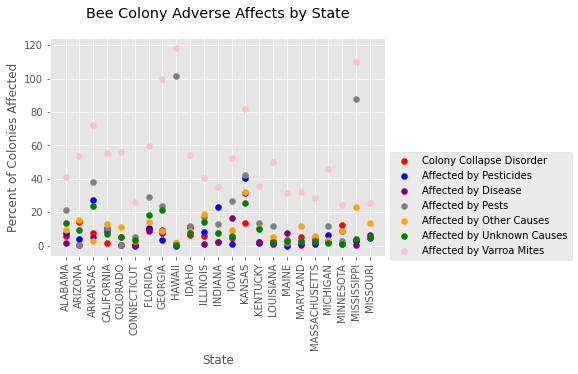

In [61]:
#Created a scatterplot to reflect percentages of colony collapse disorder and various adverse affects
fig, ax = plt.subplots()
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Disease'], color="purple", label="Affected by Disease")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Pests'], color="grey", label="Affected by Pests")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Other_Causes'], color="orange", label="Affected by Other Causes")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Unknown_Causes'], color="green", label="Affected by Unknown Causes")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Varroa_Mites'], color="pink", label="Affected by Varroa Mites")
#Pad is spacing between title and plot
ax.set_title("Bee Colony Adverse Affects by State", pad=20)
ax.set_xticklabels(grp1_usda_affects_perc.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("grp1_adverse_scatter", bbox_inches='tight')
plt.show()

#### Group 2

<ipython-input-62-f55c878093ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp2_usda_affects_perc.index, rotation=90)


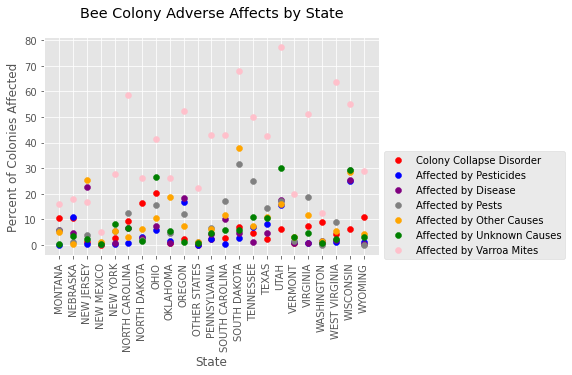

In [62]:
#Created a scatterplot to reflect percentages of colony collapse disorder and various adverse affects
fig, ax = plt.subplots()
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Disease'], color="purple", label="Affected by Disease")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Pests'], color="grey", label="Affected by Pests")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Other_Causes'], color="orange", label="Affected by Other Causes")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Unknown_Causes'], color="green", label="Affected by Unknown Causes")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Varroa_Mites'], color="pink", label="Affected by Varroa Mites")
#Pad is spacing between title and plot
ax.set_title("Bee Colony Adverse Affects by State", pad=20)
ax.set_xticklabels(grp2_usda_affects_perc.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("grp2_adverse_scatter", bbox_inches='tight')
plt.show()

### Bar plots by group showing adverse effects layered

#### Group 1

<ipython-input-63-d006d03c7213>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp1_usda_affects_perc.index, rotation=90)


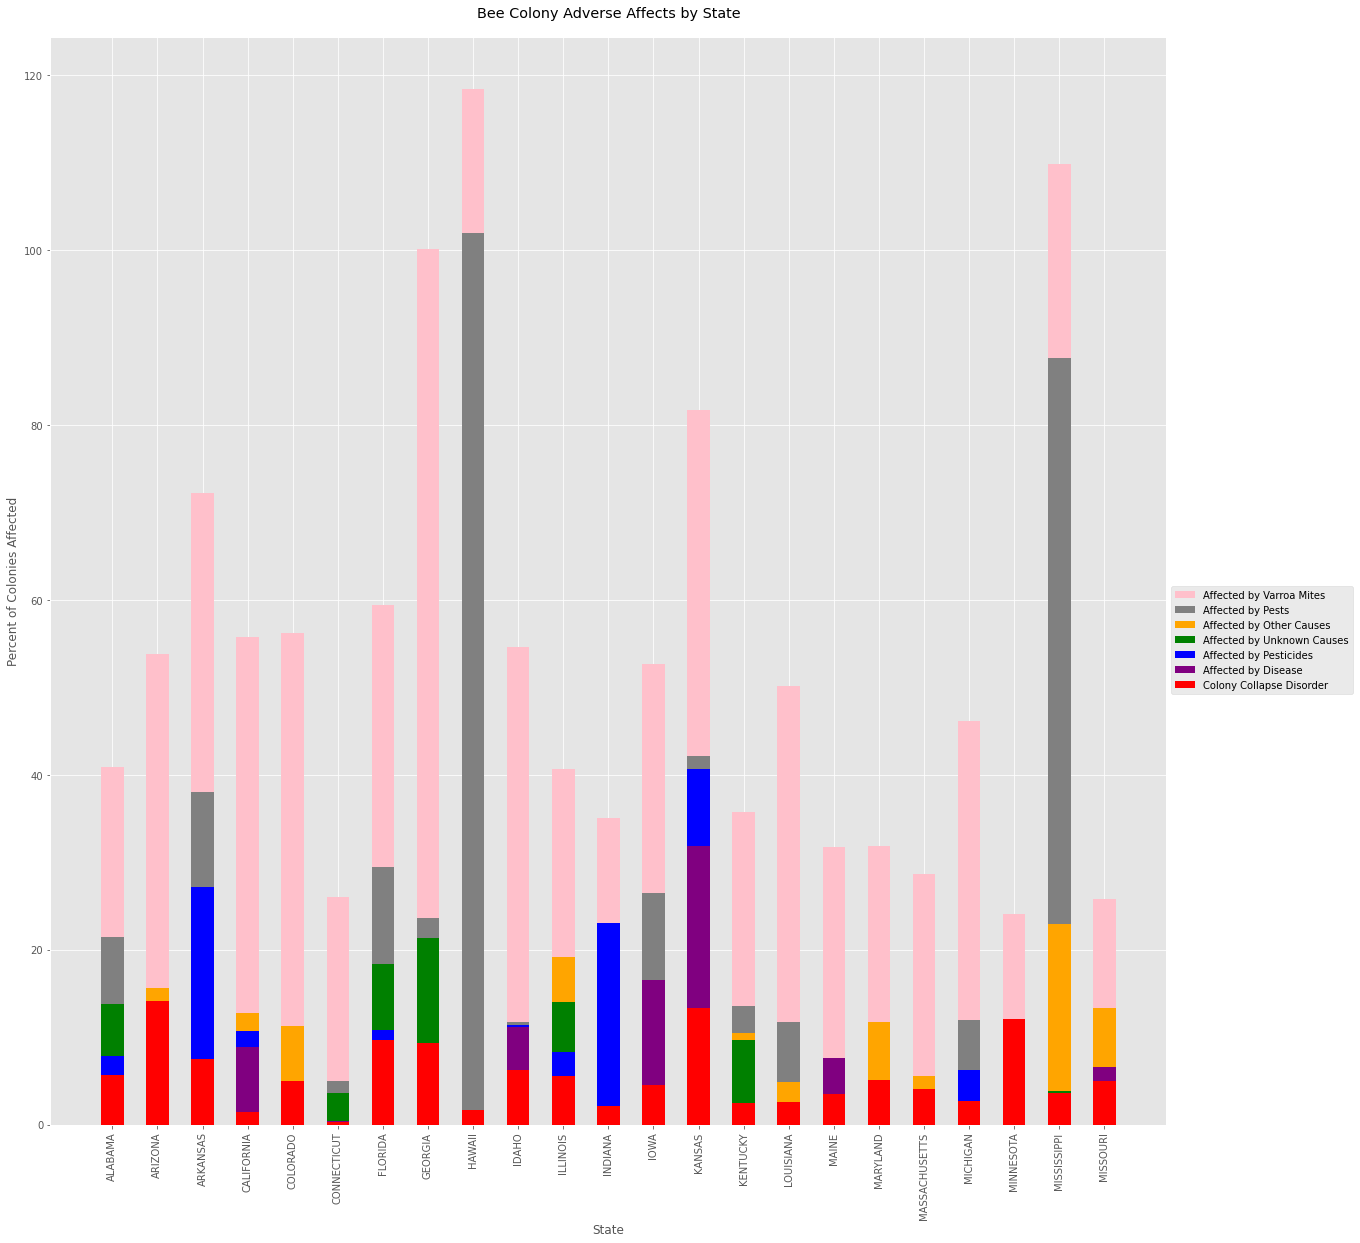

In [63]:
#Created a barplot to reflect percentages of colony collapse disorder and various adverse affects
fsize=(20,20)
fig, ax = plt.subplots(figsize=fsize)
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Varroa_Mites'], width=0.5,color="pink", label="Affected by Varroa Mites")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Pests'],width=0.5, color="grey", label="Affected by Pests")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Other_Causes'], width=0.5,color="orange", label="Affected by Other Causes")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Unknown_Causes'], width=0.5,color="green", label="Affected by Unknown Causes")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Pesticides'], width=0.5,color="blue", label="Affected by Pesticides")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Disease'],width=0.5, color="purple", label="Affected by Disease")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Lost_to_Colony_Collapse_Disorder'], width=0.5, color="red", label="Colony Collapse Disorder")
#Pad is spacing between title and plot
ax.set_title("Bee Colony Adverse Affects by State", pad=20)
ax.set_xticklabels(grp1_usda_affects_perc.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("grp1_adverse_bar", bbox_inches='tight')
plt.show()

#### Group 2

<ipython-input-64-bf7093bcf95d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp2_usda_affects_perc.index, rotation=90)


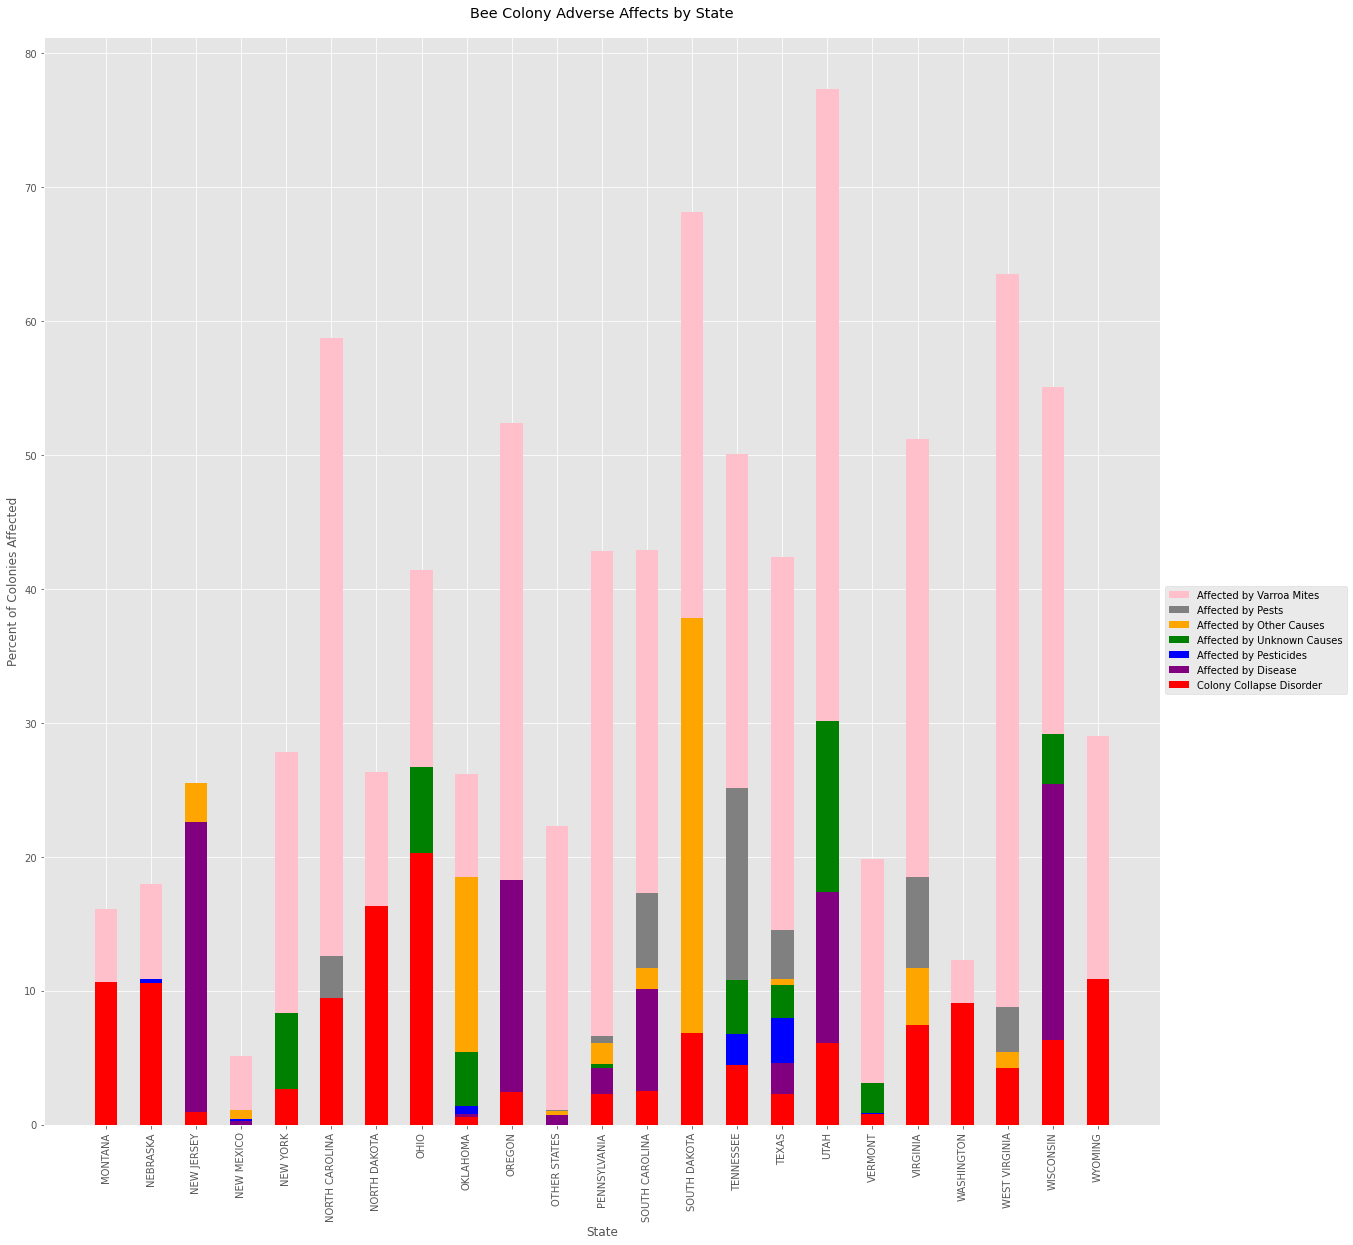

In [64]:
#Created a barplot to reflect percentages of colony collapse disorder and various adverse affects
fsize=(20,20)
fig, ax = plt.subplots(figsize=fsize)
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Varroa_Mites'], width=0.5,color="pink", label="Affected by Varroa Mites")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Pests'],width=0.5, color="grey", label="Affected by Pests")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Other_Causes'], width=0.5,color="orange", label="Affected by Other Causes")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Unknown_Causes'], width=0.5,color="green", label="Affected by Unknown Causes")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Pesticides'], width=0.5,color="blue", label="Affected by Pesticides")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Disease'],width=0.5, color="purple", label="Affected by Disease")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Lost_to_Colony_Collapse_Disorder'], width=0.5, color="red", label="Colony Collapse Disorder")
#Pad is spacing between title and plot
ax.set_title("Bee Colony Adverse Affects by State", pad=20)
ax.set_xticklabels(grp2_usda_affects_perc.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("grp2_adverse_bar", bbox_inches='tight')
plt.show()

### Created variables of the sum of each categories percentages for comparison and places them in a dataframe

In [37]:
ccd = grp1_usda_affects_perc['%_Colonies_Lost_to_Colony_Collapse_Disorder'].sum()
pesticides=grp1_usda_affects_perc['%_Colonies_Affected_by_Pesticides'].sum()
disease=grp1_usda_affects_perc['%_Colonies_Affected_by_Disease'].sum()
pests = grp1_usda_affects_perc['%_Colonies_Affected_by_Pests'].sum()
other_causes = grp1_usda_affects_perc['%_Colonies_Affected_by_Other_Causes'].sum()
unknown_causes = grp1_usda_affects_perc['%_Colonies_Affected_by_Unknown_Causes'].sum()
varroa_mites = grp1_usda_affects_perc['%_Colonies_Affected_by_Varroa_Mites'].sum()

In [56]:
df_perc_sum = pd.DataFrame({'%_sum_ccd': ccd, 
                           '%_sum_pesticides': pesticides,
                           '%_sum_disease': disease, 
                           '%_sum_pests': pests,
                           '%_sum_other_causes': other_causes,
                           '%_sum_unknown_causes': unknown_causes,
                           '%_sum_varroa_mites': varroa_mites}, index=[0])

df_perc_sum 

%_sum_ccd  %_sum_pesticides  %_sum_disease  %_sum_pests  \
0     127.35             176.0          119.5        480.0   

   %_sum_other_causes  %_sum_unknown_causes  %_sum_varroa_mites  
0               239.3                 195.3              1231.4

### Graph of the sum of percentages by categories of adverse effects

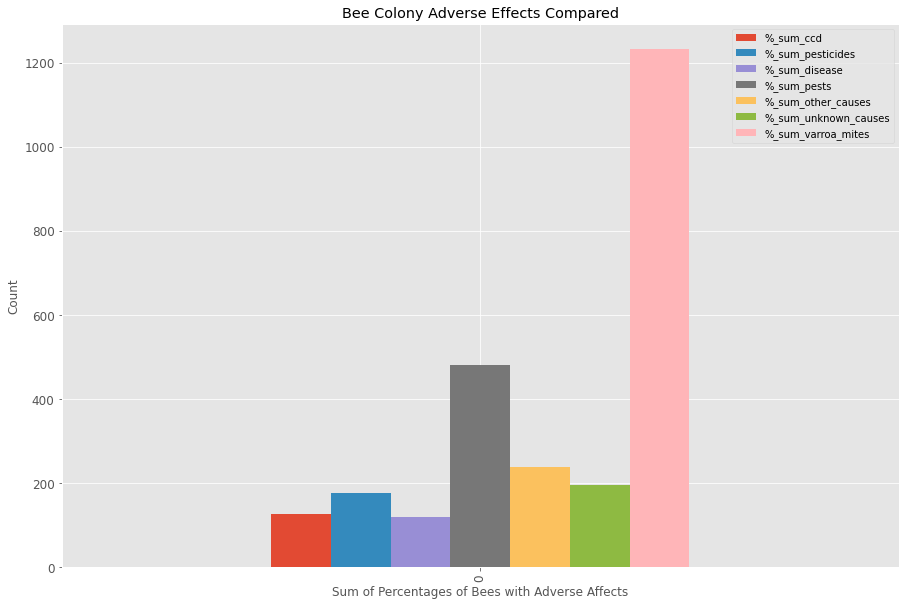

In [65]:
plt.style.use('ggplot')
ax = df_perc_sum[['%_sum_ccd','%_sum_pesticides','%_sum_disease', '%_sum_pests', '%_sum_other_causes', 
                                  '%_sum_unknown_causes', '%_sum_varroa_mites']].plot(kind='bar', 
                    title ="Bee Colony Adverse Effects Compared",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Sum of Percentages of Bees with Adverse Affects",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
plt.savefig('Sum_perc_comp', bbox_inches='tight')
plt.show()